<a href="https://colab.research.google.com/github/Arju-cmd/Face-Mask/blob/main/Facemask_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the Sequential model and layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
import numpy as np

In [4]:
from keras.preprocessing import image

In [5]:
img_width, img_height =150,150

In [6]:
Train_dat_dir = '/content/drive/MyDrive/Mydrive/Face Mask/maskdata/train'
Validation_data_dir = '/content/drive/MyDrive/Mydrive/Face Mask/maskdata/test'
Nb_train_samples =200
Nb_validation_samples = 200
Epochs = 50
batch_size = 20


In [7]:
if K.image_data_format() == 'channels_first':
  input_shape = (3,img_width, img_height )
else:
  input_shape = (img_width, img_height, 3 )

In [8]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
        Train_dat_dir,  # this is the target directory
        target_size=(img_width, img_height),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')

Found 616 images belonging to 2 classes.


In [11]:
validation_generator = test_datagen.flow_from_directory(
        Validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 198 images belonging to 2 classes.


In [12]:
# MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [14]:
# TRAINING
r = model.fit_generator(
        train_generator,
        steps_per_epoch=Nb_train_samples // batch_size,
        epochs=Epochs,
        validation_data=validation_generator,
        validation_steps = Nb_validation_samples // batch_size)



/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
10/10 [==============================] - 129s 9s/step - loss: 1.4671 - accuracy: 0.5813 - val_loss: 0.7139 - val_accuracy: 0.3333
Epoch 2/50
10/10 [==============================] - 32s 3s/step - loss: 0.6571 - accuracy: 0.6398 - val_loss: 0.7817 - val_accuracy: 0.3333
Epoch 3/50
10/10 [==============================] - 21s 2s/step - loss: 0.6028 - accuracy: 0.6431 - val_loss: 0.4861 - val_accuracy: 0.9091
Epoch 4/50
10/10 [==============================] - 14s 1s/step - loss: 0.3797 - accuracy: 0.8990 - val_loss: 0.2677 - val_accuracy: 0.9040
Epoch 5/50
10/10 [==============================] - 9s 871ms/step - loss: 0.5134 - accuracy: 0.8017 - val_loss: 0.2227 - val_accuracy: 0.9091
Epoch 6/50
10/10 [==============================] - 7s 743ms/step - loss: 0.2082 - accuracy: 0.9337 - val_loss: 0.2847 - val_accuracy: 0.8687
Epoch 7/50
10/10 [==============================] - 6s 543ms/step - loss: 0.2082 - accuracy: 0.9237 - val_loss: 0.2727 - val_accuracy: 0.8586
Epoch 8/50
10

In [64]:
model.save_weights('fiftyepochs_faceclassifier.h5')

In [57]:
pwd

'/content'

In [15]:
img_pred = image.load_img('/content/drive/MyDrive/Mydrive/Face Mask/maskdata/FinalTest/test1.jpg', target_size =(150,150) )  # this is a PIL image


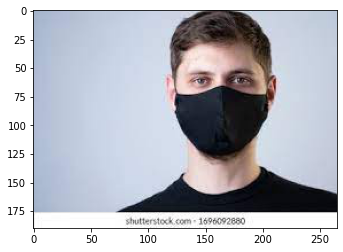

In [24]:
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline
testim = mpimg.imread('/content/drive/MyDrive/Mydrive/Face Mask/maskdata/FinalTest/test1.jpg')
#figure()
imshow(testim)

In [25]:
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis =0)

In [26]:
rslt = model.predict(img_pred)

In [27]:
print(rslt)

[[0.]]


In [28]:
if rslt[0][0] ==1:
  prediction = "No mask"
else:
  prediction = "Mask"

In [29]:
print(prediction)

Mask


In [51]:
img_pred = image.load_img('/content/drive/MyDrive/Mydrive/Face Mask/maskdata/FinalTest/maksssksksss17.png', target_size =(150,150) )  # this is a PIL image


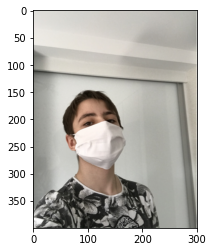

In [52]:
testim = mpimg.imread('/content/drive/MyDrive/Mydrive/Face Mask/maskdata/FinalTest/maksssksksss17.png')
#figure()
imshow(testim)

In [53]:
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis =0)

In [54]:
rslt = model.predict(img_pred)

In [55]:
if rslt[0][0] ==1:
  prediction = "No mask"
else:
  prediction = "Mask"

In [56]:
print(prediction)

Mask


In [45]:
img_pred = image.load_img('/content/drive/MyDrive/Mydrive/Face Mask/maskdata/FinalTest/ar1.jpg', target_size =(150,150) )  # this is a PIL image


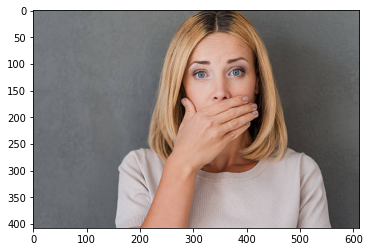

In [46]:
testim = mpimg.imread('/content/drive/MyDrive/Mydrive/Face Mask/maskdata/FinalTest/ar1.jpg')
#figure()
imshow(testim)

In [47]:
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis =0)

In [48]:
rslt = model.predict(img_pred)

In [49]:
if rslt[0][0] ==1:
  prediction = "No mask"
else:
  prediction = "Mask"

In [50]:
print(prediction)

No mask


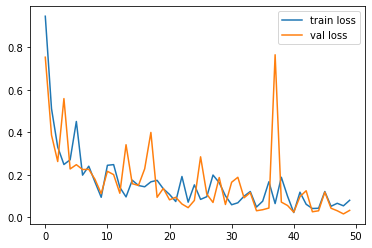

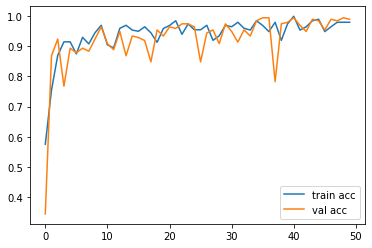

<Figure size 432x288 with 0 Axes>

In [35]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [37]:
config = model.get_config()

In [38]:
config

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 150, 150, 3),
    'dtype': 'float32',
    'name': 'conv2d_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Conv2D',
   'config': {'activation': 'linear',
    'activity_regularizer': None,
    'batch_input_shape': (None, 150, 150, 3),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'dtype': 'float32',
    'filters': 32,
    'groups': 1,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'kernel_size': (3, 3),
    'name': 'conv2d',
    'padding': 'valid',
    'strides': (1, 1),
    'trainable': True,
    'use_bias': True}},
  {'class_name': 'Activation',
   'config': {'activation': 'relu',
    'dtype': 'float32',
    'name': 'activation',
  

In [39]:
weights = model.get_weights()

In [40]:
weights

[array([[[[ 1.77510604e-02, -8.78693238e-02, -1.81488786e-02,
           -4.38520424e-02,  1.04599036e-01, -2.70304978e-02,
            7.67766163e-02, -3.38806324e-02, -8.58347043e-02,
           -9.97708738e-03, -6.75368980e-02, -8.64339545e-02,
           -9.18899104e-03, -1.31058171e-01, -1.10888995e-01,
            5.19066714e-02, -7.13428631e-02, -1.12642370e-01,
           -3.84387677e-03,  7.01740980e-02, -1.23685142e-02,
           -1.22663938e-01,  8.69857799e-03,  1.44083025e-02,
            2.06631664e-02, -1.29992515e-01,  1.27798244e-01,
           -9.20289680e-02, -3.49658239e-03, -1.68781951e-02,
           -4.57255393e-02, -7.83310831e-02],
          [ 1.12698339e-01,  1.26913160e-01, -1.13763092e-02,
           -9.26751643e-02,  5.13410270e-02,  1.02058694e-01,
           -3.25309113e-02,  3.24692540e-02,  1.02288730e-01,
            3.09765097e-02, -1.15153892e-02,  9.57674235e-02,
            1.40737087e-01, -5.84705658e-02, -9.54104215e-02,
            1.15109399e-

In [1]:
!git clone https://github.com/Arju-cmd/Face-Mask


Cloning into 'Face-Mask'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 51 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (51/51), done.


In [66]:
%cd Face-Mask

/content/Face-Mask


In [67]:

import cv2
import os
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from google.colab.patches import cv2_imshow

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")
model = load_model("/content/model_inception.h5")

def face_mask_detector(frame):
  # frame = cv2.imread(fileName)
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray,
                                        scaleFactor=1.1,
                                        minNeighbors=5,
                                        minSize=(60, 60),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
  faces_list=[]
  preds=[]
  for (x, y, w, h) in faces:
      face_frame = frame[y:y+h,x:x+w]
      face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
      face_frame = cv2.resize(face_frame, (224, 224))
      face_frame = img_to_array(face_frame)
      face_frame = np.expand_dims(face_frame, axis=0)
      face_frame =  preprocess_input(face_frame)
      faces_list.append(face_frame)
      if len(faces_list)>0:
          preds = model.predict(faces_list)
      for pred in preds:
          (mask, withoutMask) = pred
      label = "Mask" if mask > withoutMask else "No Mask"
      color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      cv2.putText(frame, label, (x, y- 10),
                  cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

      cv2.rectangle(frame, (x, y), (x + w, y + h),color, 3)
  # cv2_imshow(frame)
  return frame

In [68]:
input_image = cv2.imread("image.jpg")
output = face_mask_detector(input_image)
cv2_imshow(output)

ValueError: ignored